## Analyzing some 911 call data from Kaggle. 

### The data contains the following fields:
lat : String variable, Latitude

lng: String variable, Longitude

desc: String variable, Description of the Emergency Call

zip: String variable, Zipcode

title: String variable, Title

timeStamp: String variable, YYYY-MM-DD HH:MM:SS

twp: String variable, Township

addr: String variable, Address

e: String variable, Dummy variable (always 1)

#Import numpy and pandas

In [1]:
import numpy as np
import pandas as pd

#Import visualization libraries and set %matplotlib inline.

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline 

#Reading in the csv file as a dataframe called df

In [3]:
df = pd.read_csv('911.csv')

#Checking the info() of the df

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
lat          99492 non-null float64
lng          99492 non-null float64
desc         99492 non-null object
zip          86637 non-null float64
title        99492 non-null object
timeStamp    99492 non-null object
twp          99449 non-null object
addr         98973 non-null object
e            99492 non-null int64
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


#Checking the head of df

In [5]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


#Top 5 zipcodes for 911 calls?

In [6]:
df['zip'].value_counts().head(5)

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

#Top 5 townships (twp) for 911 calls?

In [7]:
df['twp'].value_counts().head(5)

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

#Unique title codes?

In [8]:
df['title'].nunique()

110

#Creating new features

##In the titles column there are "Reasons/Departments" specified before the title code.These are EMS, Fire, and Traffic. 
Using .apply() with a custom lambda expression to create a new column called "Reason" that contains this string value.

###For example, if the title column value is EMS: BACK PAINS/INJURY , the Reason column value would be EMS.

In [9]:
df['Reason'] = df['title'].apply(lambda x: x.split(':')[0])
df['Reason']

0            EMS
1            EMS
2           Fire
3            EMS
4            EMS
5            EMS
6            EMS
7            EMS
8            EMS
9        Traffic
10       Traffic
11       Traffic
12       Traffic
13       Traffic
14       Traffic
15       Traffic
16           EMS
17           EMS
18           EMS
19       Traffic
20       Traffic
21       Traffic
22          Fire
23       Traffic
24       Traffic
25           EMS
26           EMS
27          Fire
28       Traffic
29       Traffic
          ...   
99462        EMS
99463        EMS
99464        EMS
99465        EMS
99466        EMS
99467        EMS
99468       Fire
99469       Fire
99470        EMS
99471        EMS
99472        EMS
99473        EMS
99474        EMS
99475    Traffic
99476        EMS
99477        EMS
99478    Traffic
99479        EMS
99480        EMS
99481        EMS
99482    Traffic
99483        EMS
99484       Fire
99485    Traffic
99486    Traffic
99487    Traffic
99488    Traffic
99489        E

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 10 columns):
lat          99492 non-null float64
lng          99492 non-null float64
desc         99492 non-null object
zip          86637 non-null float64
title        99492 non-null object
timeStamp    99492 non-null object
twp          99449 non-null object
addr         98973 non-null object
e            99492 non-null int64
Reason       99492 non-null object
dtypes: float64(3), int64(1), object(6)
memory usage: 7.6+ MB


#Most common Reason for a 911 call based off of this new column?

In [11]:
df['Reason'].value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: Reason, dtype: int64

#Using seaborn to create a countplot of 911 calls by Reason.

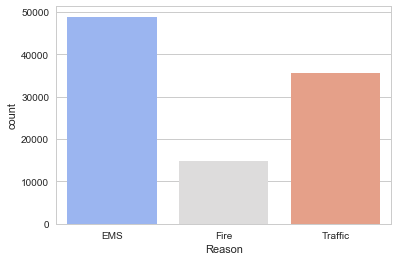

In [12]:
sns.countplot(x='Reason',data=df,palette='coolwarm')

#Focusing on time information. #Data type of the objects in the timeStamp column?

In [13]:
type(df['timeStamp'].iloc[0])

str

#You should have seen that these timestamps are still strings. 
#Using pd.to_datetime to convert the column from strings to DateTime objects.

In [14]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'] )

#Using .apply() to create 3 new columns called Hour, Month, and Day of Week.Creating these columns based off of the timeStamp column

In [15]:
df['Hour'] = df['timeStamp'].apply(lambda time: time.hour)
df['Month'] = df['timeStamp'].apply(lambda time: time.month)
df['Dayofweek'] = df['timeStamp'].apply(lambda time: time.dayofweek)

#Day of Week is an integer 0-6. Using the .map() with this dictionary to map the actual string names to the day of the week

dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [16]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thur',4:'Fri',5:'Sat',6:'Sun'}

In [17]:
df['Dayofweek']=df['Dayofweek'].map(dmap)
df['Dayofweek']

0        Thur
1        Thur
2        Thur
3        Thur
4        Thur
5        Thur
6        Thur
7        Thur
8        Thur
9        Thur
10       Thur
11       Thur
12       Thur
13       Thur
14       Thur
15       Thur
16       Thur
17       Thur
18       Thur
19       Thur
20       Thur
21       Thur
22       Thur
23       Thur
24       Thur
25       Thur
26       Thur
27       Thur
28       Thur
29       Thur
         ... 
99462     Wed
99463     Wed
99464     Wed
99465     Wed
99466     Wed
99467     Wed
99468     Wed
99469     Wed
99470     Wed
99471     Wed
99472     Wed
99473     Wed
99474     Wed
99475     Wed
99476     Wed
99477     Wed
99478     Wed
99479     Wed
99480     Wed
99481     Wed
99482     Wed
99483     Wed
99484     Wed
99485     Wed
99486     Wed
99487     Wed
99488     Wed
99489     Wed
99490     Wed
99491     Wed
Name: Dayofweek, Length: 99492, dtype: object

#Using seaborn to create a countplot of the Day of Week column with the hue based off of the Reason column.

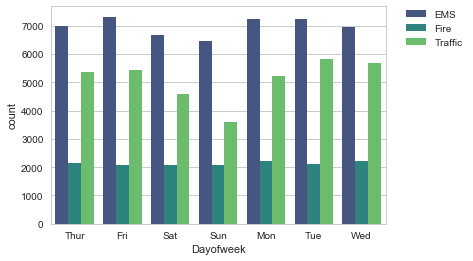

In [18]:
sns.countplot(x='Dayofweek',data=df,hue='Reason',palette='viridis')
#plt.legend(loc='upper right')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


#same for Month:

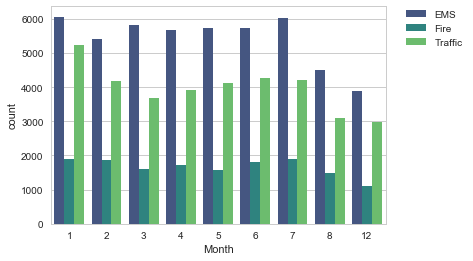

In [19]:
sns.countplot(x='Month',data=df,hue='Reason',palette='viridis')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

#Noticed above plot missing some Months, filling this,by plotting the information in another way, possibly a simple line plot that fills in the missing months, in order to do this, we'll need to do some work with pandas..

#creating a gropuby object called byMonth, where you group the DataFrame by the month column and using the count() method for aggregation.Using the head() method on this returned DataFrame.

In [20]:
df.columns

Index(['lat', 'lng', 'desc', 'zip', 'title', 'timeStamp', 'twp', 'addr', 'e',
       'Reason', 'Hour', 'Month', 'Dayofweek'],
      dtype='object')

In [21]:
byMonth = df.groupby(['Month']).count()
byMonth.head(5)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Dayofweek
Month,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423


#Creating a simple plot off of the dataframe indicating the count of calls per month.

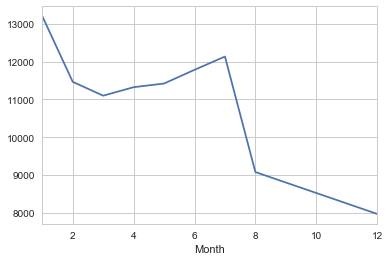

In [22]:
byMonth['e'].plot()

#Using seaborn's lmplot() to create a linear fit on the number of calls per month. #Need to reset the index to a column.

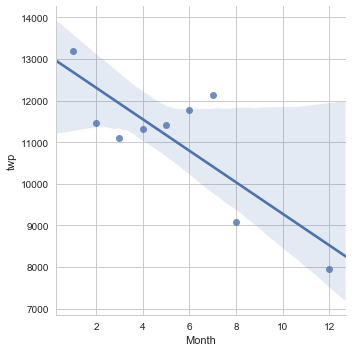

In [23]:
byMonth = byMonth.reset_index()
sns.lmplot(x='Month',y='twp',data=byMonth)

Creating a new column called 'Date' that contains the date from the timeStamp column.

In [24]:
df['Date'] = df['timeStamp'].apply(lambda time: time.date())
df['Date']

0        2015-12-10
1        2015-12-10
2        2015-12-10
3        2015-12-10
4        2015-12-10
5        2015-12-10
6        2015-12-10
7        2015-12-10
8        2015-12-10
9        2015-12-10
10       2015-12-10
11       2015-12-10
12       2015-12-10
13       2015-12-10
14       2015-12-10
15       2015-12-10
16       2015-12-10
17       2015-12-10
18       2015-12-10
19       2015-12-10
20       2015-12-10
21       2015-12-10
22       2015-12-10
23       2015-12-10
24       2015-12-10
25       2015-12-10
26       2015-12-10
27       2015-12-10
28       2015-12-10
29       2015-12-10
            ...    
99462    2016-08-24
99463    2016-08-24
99464    2016-08-24
99465    2016-08-24
99466    2016-08-24
99467    2016-08-24
99468    2016-08-24
99469    2016-08-24
99470    2016-08-24
99471    2016-08-24
99472    2016-08-24
99473    2016-08-24
99474    2016-08-24
99475    2016-08-24
99476    2016-08-24
99477    2016-08-24
99478    2016-08-24
99479    2016-08-24
99480    2016-08-24


#grouping by this Date column with the count() aggregate and creating a plot of counts of 911 calls.

In [25]:
byDate = df.groupby('Date').count()
byDate

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Dayofweek
Date,,,,,,,,,,,,,
2015-12-10,115,115,115,100,115,115,115,113,115,115,115,115,115
2015-12-11,396,396,396,333,396,396,395,391,396,396,396,396,396
2015-12-12,403,403,403,333,403,403,403,401,403,403,403,403,403
2015-12-13,319,319,319,280,319,319,319,317,319,319,319,319,319
2015-12-14,447,447,447,387,447,447,446,445,447,447,447,447,447
2015-12-15,421,421,421,380,421,421,420,419,421,421,421,421,421
2015-12-16,377,377,377,343,377,377,377,376,377,377,377,377,377
2015-12-17,388,388,388,336,388,388,388,387,388,388,388,388,388
2015-12-18,346,346,346,306,346,346,346,346,346,346,346,346,346


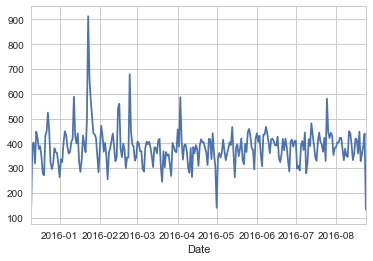

In [26]:
byDate['e'].plot()

#Recreating this plot but creating 3 separate plots with each plot representing a Reason for the 911 call

In [27]:
byDatereason = df.groupby(['Date','Reason']).count()
byDatereason = byDatereason.reset_index(level=1)

In [28]:
byDatereason

,Reason,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Hour,Month,Dayofweek
Date,,,,,,,,,,,,,
2015-12-10,EMS,57,57,57,52,57,57,57,57,57,57,57,57
2015-12-10,Fire,15,15,15,13,15,15,15,15,15,15,15,15
2015-12-10,Traffic,43,43,43,35,43,43,43,41,43,43,43,43
2015-12-11,EMS,186,186,186,166,186,186,186,186,186,186,186,186
2015-12-11,Fire,69,69,69,59,69,69,68,68,69,69,69,69
2015-12-11,Traffic,141,141,141,108,141,141,141,137,141,141,141,141
2015-12-12,EMS,189,189,189,171,189,189,189,189,189,189,189,189
2015-12-12,Fire,68,68,68,53,68,68,68,68,68,68,68,68
2015-12-12,Traffic,146,146,146,109,146,146,146,144,146,146,146,146


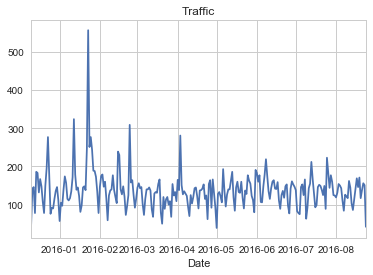

In [29]:
byDatereason[byDatereason['Reason'] == 'Traffic']['e'].plot()
plt.title('Traffic')

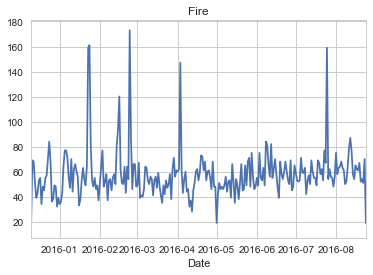

In [30]:
byDatereason[byDatereason['Reason'] == 'Fire']['e'].plot()
plt.title('Fire')

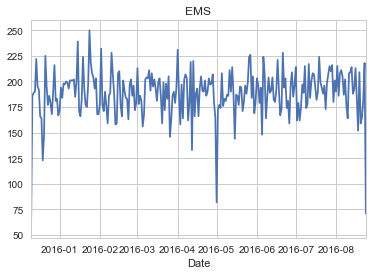

In [31]:
byDatereason[byDatereason['Reason'] == 'EMS']['e'].plot()
plt.title('EMS')

#Now creating heatmaps with seaborn and our data. 
#Restructure the dataframe so that the columns become the Hours and the Index becomes the Day of the Week using unstack.

In [32]:
dayHour = df.groupby(by=['Dayofweek','Hour']).count()['Reason'].unstack()
dayHour.head()

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Dayofweek,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thur,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354


#Creating a HeatMap using this new DataFrame.

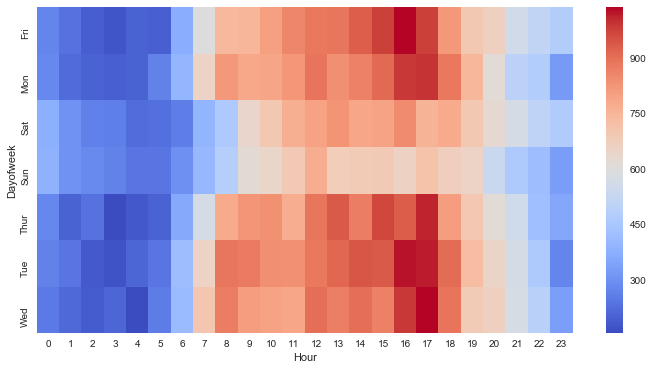

In [33]:
plt.figure(figsize=(12,6))
sns.heatmap(dayHour,cmap='coolwarm')

#Creating a clustermap using this DataFrame.

C:\Users\Alekhya\Anaconda3\lib\site-packages\matplotlib\cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


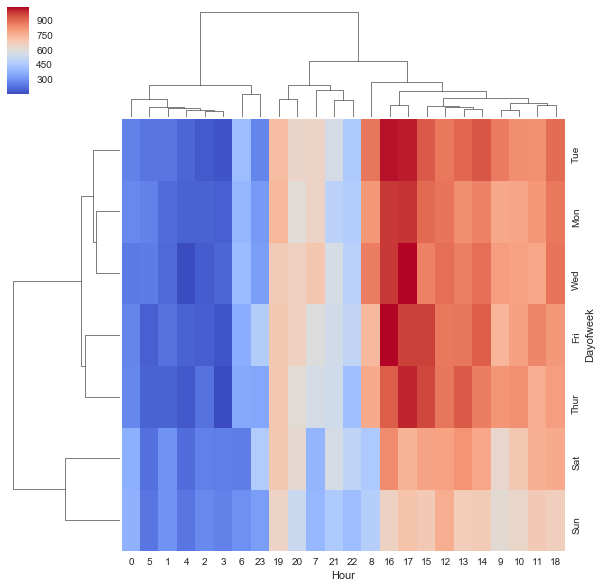

In [34]:
sns.clustermap(dayHour,cmap='coolwarm')

#Repeating these same plots and operations, for a DataFrame that shows the Month as the column.

In [35]:
dayMonth = df.groupby(by=['Dayofweek','Month']).count()['Reason'].unstack()
dayMonth.head()

Month,1,2,3,4,5,6,7,8,12
Dayofweek,,,,,,,,,
Fri,1970,1581,1525,1958,1730,1649,2045,1310,1065
Mon,1727,1964,1535,1598,1779,1617,1692,1511,1257
Sat,2291,1441,1266,1734,1444,1388,1695,1099,978
Sun,1960,1229,1102,1488,1424,1333,1672,1021,907
Thur,1584,1596,1900,1601,1590,2065,1646,1230,1266


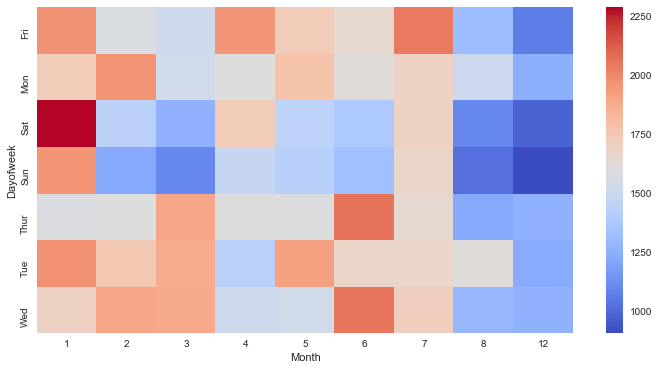

In [36]:
#Heat map

plt.figure(figsize=(12,6))
sns.heatmap(dayMonth,cmap='coolwarm')

C:\Users\Alekhya\Anaconda3\lib\site-packages\matplotlib\cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


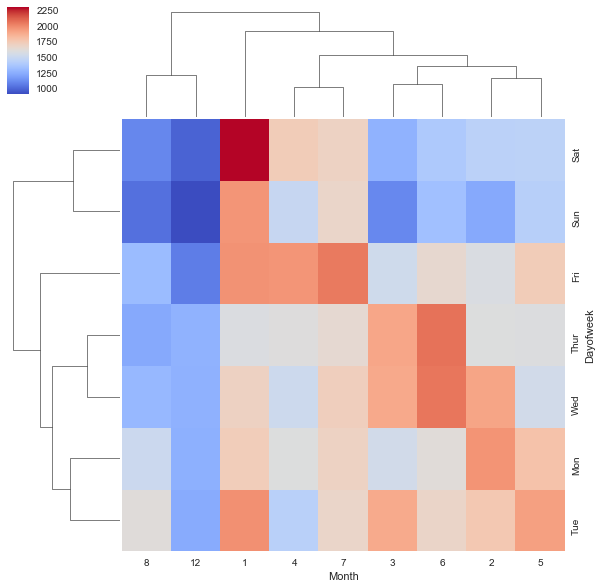

In [38]:
#Cluster map.

sns.clustermap(dayMonth,cmap='coolwarm')

##### We Continue exploring the Data...